In [27]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [89]:
from tqdm import tqdm

In [4]:
simplices_nodes = list(pd.read_csv("coauth-MAG-Geology-simplices.txt", header = None)[0])

In [8]:
simplices_sizes = list(pd.read_csv("coauth-MAG-Geology-nverts.txt", header = None)[0])

(array([0.00000e+00, 5.45704e+05, 3.55131e+05, 2.59187e+05, 1.73031e+05,
        1.05190e+05, 6.17220e+04, 3.50790e+04, 2.09150e+04, 1.21440e+04,
        7.70400e+03, 4.40800e+03, 2.97500e+03, 1.84200e+03, 1.37300e+03,
        9.15000e+02, 7.42000e+02, 5.00000e+02, 4.39000e+02, 3.40000e+02,
        2.49000e+02, 1.79000e+02, 1.80000e+02, 2.77000e+02]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 24 artists>)

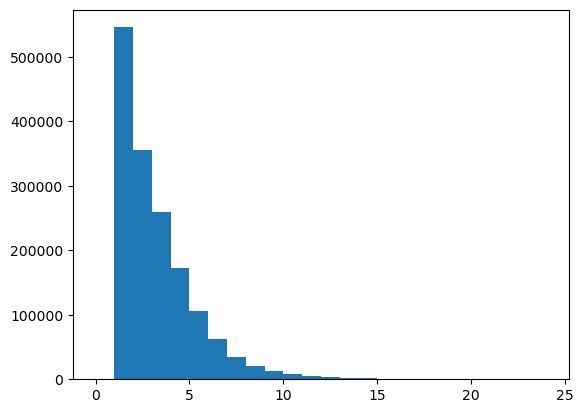

In [9]:
plt.hist(simplices_sizes, bins = range(0, max(simplices_sizes)))

In [19]:
#pd.read_csv("coauth-MAG-Geology-node-labels.txt", on_bad_lines='skip', header = None)

In [20]:
#pd.read_csv("coauth-MAG-Geology-simplex-labels.txt", on_bad_lines='skip', header = None, sep = "\t")

In [10]:
with open('dataframe.pkl', 'rb') as f:
    df = pk.load(f)

In [11]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [22]:
df.groupby("Time").count().iloc[80:100]

,Simplices,Size
Time,,
1893.0,184,184
1894.0,204,204
1895.0,155,155
1896.0,208,208
1897.0,174,174
1898.0,168,168
1899.0,172,172
1900.0,280,280
1901.0,146,146


In [82]:
y1 = 1980
y2 = 1981

In [84]:
l1 = list(df[df["Time"]==y1]["Simplices"])
l1

[[102.0, 101.0],
 [760.0],
 [1738.0],
 [1766.0],
 [1870.0],
 [2109.0, 2110.0, 2111.0],
 [3007.0],
 [3129.0],
 [3150.0, 3151.0],
 [3628.0, 3626.0, 3627.0],
 [3651.0],
 [3719.0],
 [3882.0],
 [3931.0],
 [4989.0],
 [5189.0],
 [5194.0, 5195.0],
 [5360.0, 5361.0],
 [5620.0, 5621.0],
 [6097.0, 6099.0, 6098.0],
 [6559.0],
 [6688.0, 6687.0],
 [6701.0, 6702.0],
 [6717.0, 6714.0, 6715.0, 6716.0],
 [6719.0, 6718.0],
 [6772.0, 6773.0],
 [7007.0, 7008.0, 7009.0],
 [7183.0, 7184.0],
 [7596.0, 3361.0, 7595.0, 7594.0],
 [7673.0],
 [8656.0],
 [8889.0, 8887.0, 8890.0, 8888.0],
 [9301.0],
 [9601.0],
 [10453.0, 10452.0],
 [10933.0, 10932.0],
 [10997.0],
 [11992.0, 11991.0, 11990.0],
 [12043.0, 12042.0],
 [12192.0, 12193.0, 12191.0],
 [12212.0, 12213.0],
 [12348.0, 12347.0],
 [12743.0, 7010.0],
 [12782.0, 12785.0, 12783.0, 12784.0],
 [12928.0],
 [13028.0],
 [13614.0, 13613.0],
 [13762.0],
 [12743.0, 14268.0, 14267.0, 14266.0],
 [8458.0, 14749.0, 14748.0, 14750.0],
 [15287.0, 15286.0],
 [16884.0, 16883.0],
 

In [85]:
l2 = list(df[df["Time"]==y2]["Simplices"])

In [86]:
over = np.zeros((len(l1),len(l2)))

In [87]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

In [90]:
for i, s1 in tqdm(enumerate(l1), desc = "progress_bar"):
    for j, s2 in enumerate(l2):
        over[i][j] = overlap_size(set(s1),set(s2))

progress_bar: 3227it [01:34, 34.17it/s]


KeyboardInterrupt: 

<AxesSubplot:>

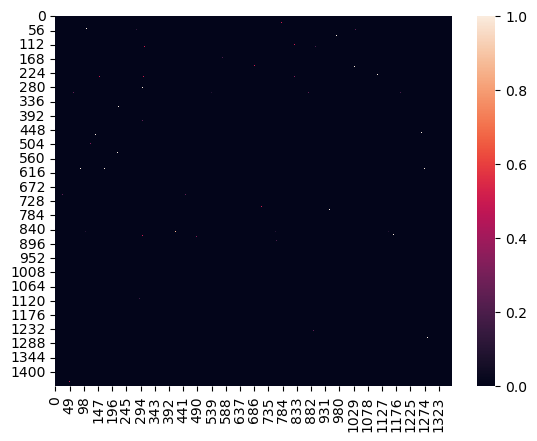

In [80]:
sns.heatmap(over)

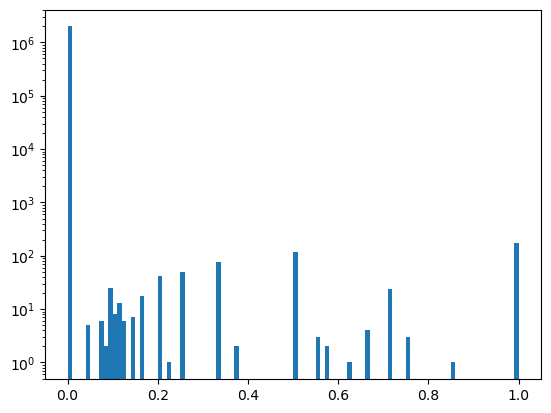

In [81]:
plt.hist(over.flatten(), bins = 100)
plt.yscale("log")

In [70]:
np.where(over==0.5)

(array([ 17,  77,  77, 113, 116, 116, 121, 121, 164, 186, 196, 200, 200,
        276]),
 array([ 94,   8, 136,  44, 134, 137,   8, 136,  66,  96,  94,   8, 136,
        120]))

In [71]:
l1[17]

[204804.0, 204803.0]

In [72]:
l2[94]

[204803.0]

In [56]:
over[over==0]

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
np.count_nonzero(over)

63